# Noising Experiments for q = 0 and Speckle Noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import speckle_noise_gs, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image, add_speckle_noise
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray

## Imagens default

In [2]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:51: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [4]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,0,0.639551,0.026706,0.683726,0.314019,0.972884,0.026911,0.000205,colored_k6
1,0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,uniform 127


--------------------------

## Dataset and default

In [2]:
image_data = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis_default.csv")


In [7]:
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.0
1,0,0.210687,0.197527,0.955210,0.058600,0.544020,0.326754,0.129226,canesugar01-r000-s001.png,0.1
2,0,0.203993,0.191654,0.958163,0.054797,0.537327,0.327163,0.135510,canesugar01-r000-s001.png,0.2
3,0,0.187055,0.196025,0.962632,0.049210,0.520388,0.337818,0.141794,canesugar01-r000-s001.png,0.3
4,0,0.185484,0.182843,0.964547,0.046534,0.518817,0.332013,0.149170,canesugar01-r000-s001.png,0.4


In [8]:
image_data_default.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
0,0,0.578831,0.078683,0.738085,0.273204,0.912164,0.083259,0.004576,colored_k6,0.0
1,0,0.329804,0.191654,0.895724,0.125896,0.663138,0.264258,0.072604,colored_k6,0.1
2,0,0.217585,0.174237,0.940060,0.071029,0.550919,0.311659,0.137422,colored_k6,0.2
3,0,0.177492,0.146301,0.948345,0.057849,0.510826,0.317738,0.171436,colored_k6,0.3
4,0,0.161578,0.116454,0.948639,0.053925,0.494912,0.310771,0.194317,colored_k6,0.4


In [9]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']
['colored_k6' 'uniform 127']


In [11]:
print("Image data NOISE PROB unique",image_data.noise_intensity.unique())
print("Default data NOISE PROB unique",image_data_default.noise_intensity.unique())

Image data NOISE PROB unique [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Default data NOISE PROB unique [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [12]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')& (image_data['image_name'] != 'default')]

In [13]:
print(dataset_data.shape)
dataset_data.head()

(275, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.0
1,0,0.210687,0.197527,0.955210,0.058600,0.544020,0.326754,0.129226,canesugar01-r000-s001.png,0.1
2,0,0.203993,0.191654,0.958163,0.054797,0.537327,0.327163,0.135510,canesugar01-r000-s001.png,0.2
3,0,0.187055,0.196025,0.962632,0.049210,0.520388,0.337818,0.141794,canesugar01-r000-s001.png,0.3
4,0,0.185484,0.182843,0.964547,0.046534,0.518817,0.332013,0.149170,canesugar01-r000-s001.png,0.4


Plotting the plane for the default images (q=0)

In [14]:
q_value = 0
default_data_q0 = default_data[(default_data['q'] == q_value)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(22, 10)
(22, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
0,0,0.578831,0.078683,0.738085,0.273204,0.912164,0.083259,0.004576,colored_k6,0.0
1,0,0.329804,0.191654,0.895724,0.125896,0.663138,0.264258,0.072604,colored_k6,0.1
2,0,0.217585,0.174237,0.940060,0.071029,0.550919,0.311659,0.137422,colored_k6,0.2
3,0,0.177492,0.146301,0.948345,0.057849,0.510826,0.317738,0.171436,colored_k6,0.3
4,0,0.161578,0.116454,0.948639,0.053925,0.494912,0.310771,0.194317,colored_k6,0.4


In [16]:
default_data[(default_data['q'] == 0) & (default_data['noise_intensity'] == 0.5)]

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
5,0,0.150855,0.091797,0.943921,0.055853,0.484188,0.303804,0.212007,colored_k6,0.5
16,0,0.005510,0.009016,0.998027,0.002577,0.338843,0.335086,0.326071,uniform 127,0.5


In [17]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12560\3923619582.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} speckle")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12560\3923619582.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} speckle")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_12560\3923619582.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


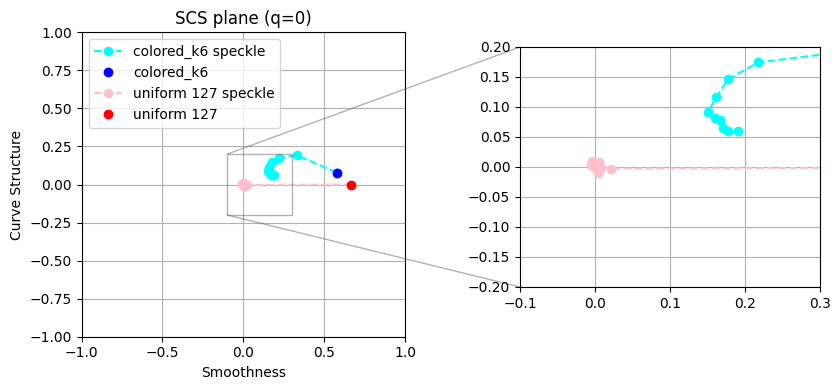

In [20]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_intensity')
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['noise_intensity'] == 0)]
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} speckle")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} speckle")
    # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.1, 0.3, -0.2, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

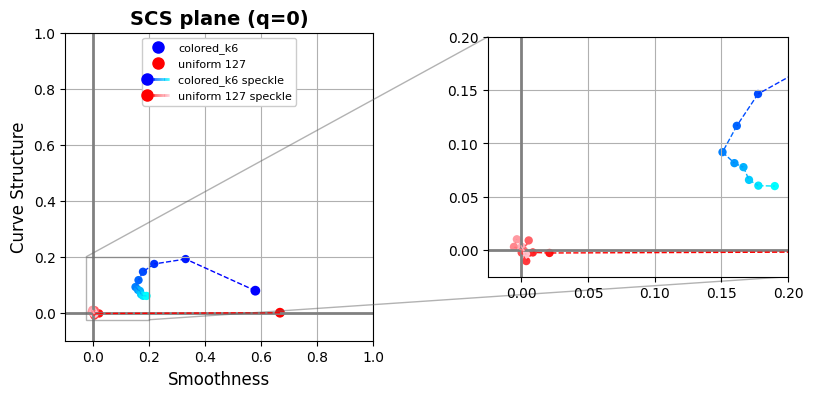

In [24]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}

unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    # Get and sort data
    df_data_filtered = default_data_q0[
        (default_data_q0['image_name'] == imageName)
    ].sort_values('noise_intensity')
    
    df_no_noise = df_data_filtered[
        (df_data_filtered['noise_intensity'] == 0)
    ]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Smoothness'].values
        y = df_data_filtered['Curve structure'].values
        noise_intensities = df_data_filtered['noise_intensity'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{imageName}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_intensities.min(), vmax=noise_intensities.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_intensities)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_intensities))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=imageName, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img} speckle" for img in unique_default_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)

# Inset configuration
axins.set_xlim(-0.025, 0.2)
axins.set_ylim(-0.025, 0.2)
axins.set_aspect('auto')  # Force square aspect ratio
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/speckle/speckle_default_images_scs_q{q_value}.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be inc

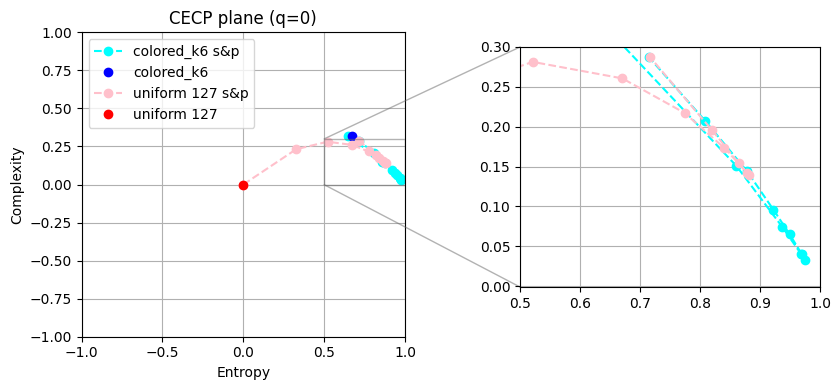

In [22]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_prob')
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    # plt.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Weighted Entropy Correct vs. Weighted Complexity Correct, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q={q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.5, 1, -0.001, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

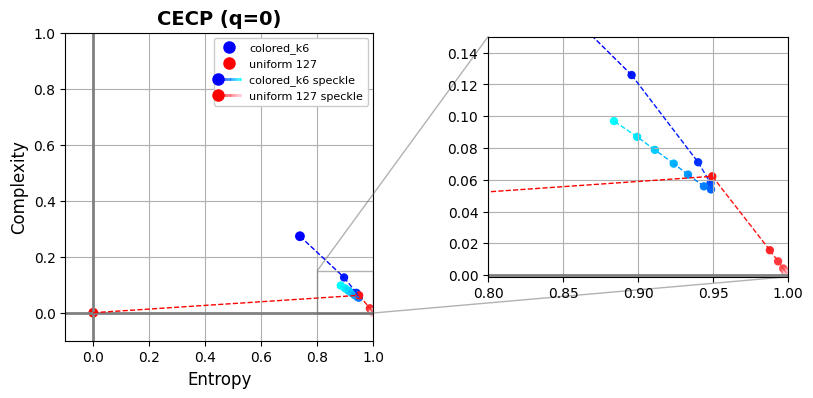

In [32]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}

unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    # Get and sort data
    df_data_filtered = default_data_q0[
        (default_data_q0['image_name'] == imageName)
    ].sort_values('noise_intensity')
    
    df_no_noise = df_data_filtered[
        (df_data_filtered['noise_intensity'] == 0)
    ]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Weighted Entropy Correct'].values
        y = df_data_filtered['Weighted Complexity Correct'].values
        noise_intensities = df_data_filtered['noise_intensity'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{imageName}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_intensities.min(), vmax=noise_intensities.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_intensities)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_intensities))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=imageName, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img} speckle" for img in unique_default_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)

# Inset configuration
x1, x2, y1, y2 = 0.8, 1, -0.001, 0.15
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')  # Force square aspect ratio
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/speckle/speckle_default_images_cecp_q{q_value}.png', bbox_inches='tight')
plt.show()

Plotting the plane for the dataset images (q=0)

In [27]:
q_value = 0
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(275, 10)
(275, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_intensity
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.0
1,0,0.210687,0.197527,0.955210,0.058600,0.544020,0.326754,0.129226,canesugar01-r000-s001.png,0.1
2,0,0.203993,0.191654,0.958163,0.054797,0.537327,0.327163,0.135510,canesugar01-r000-s001.png,0.2
3,0,0.187055,0.196025,0.962632,0.049210,0.520388,0.337818,0.141794,canesugar01-r000-s001.png,0.3
4,0,0.185484,0.182843,0.964547,0.046534,0.518817,0.332013,0.149170,canesugar01-r000-s001.png,0.4


In [28]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

In [29]:
dataset_data_q0['noise_intensity'].unique()

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Saving

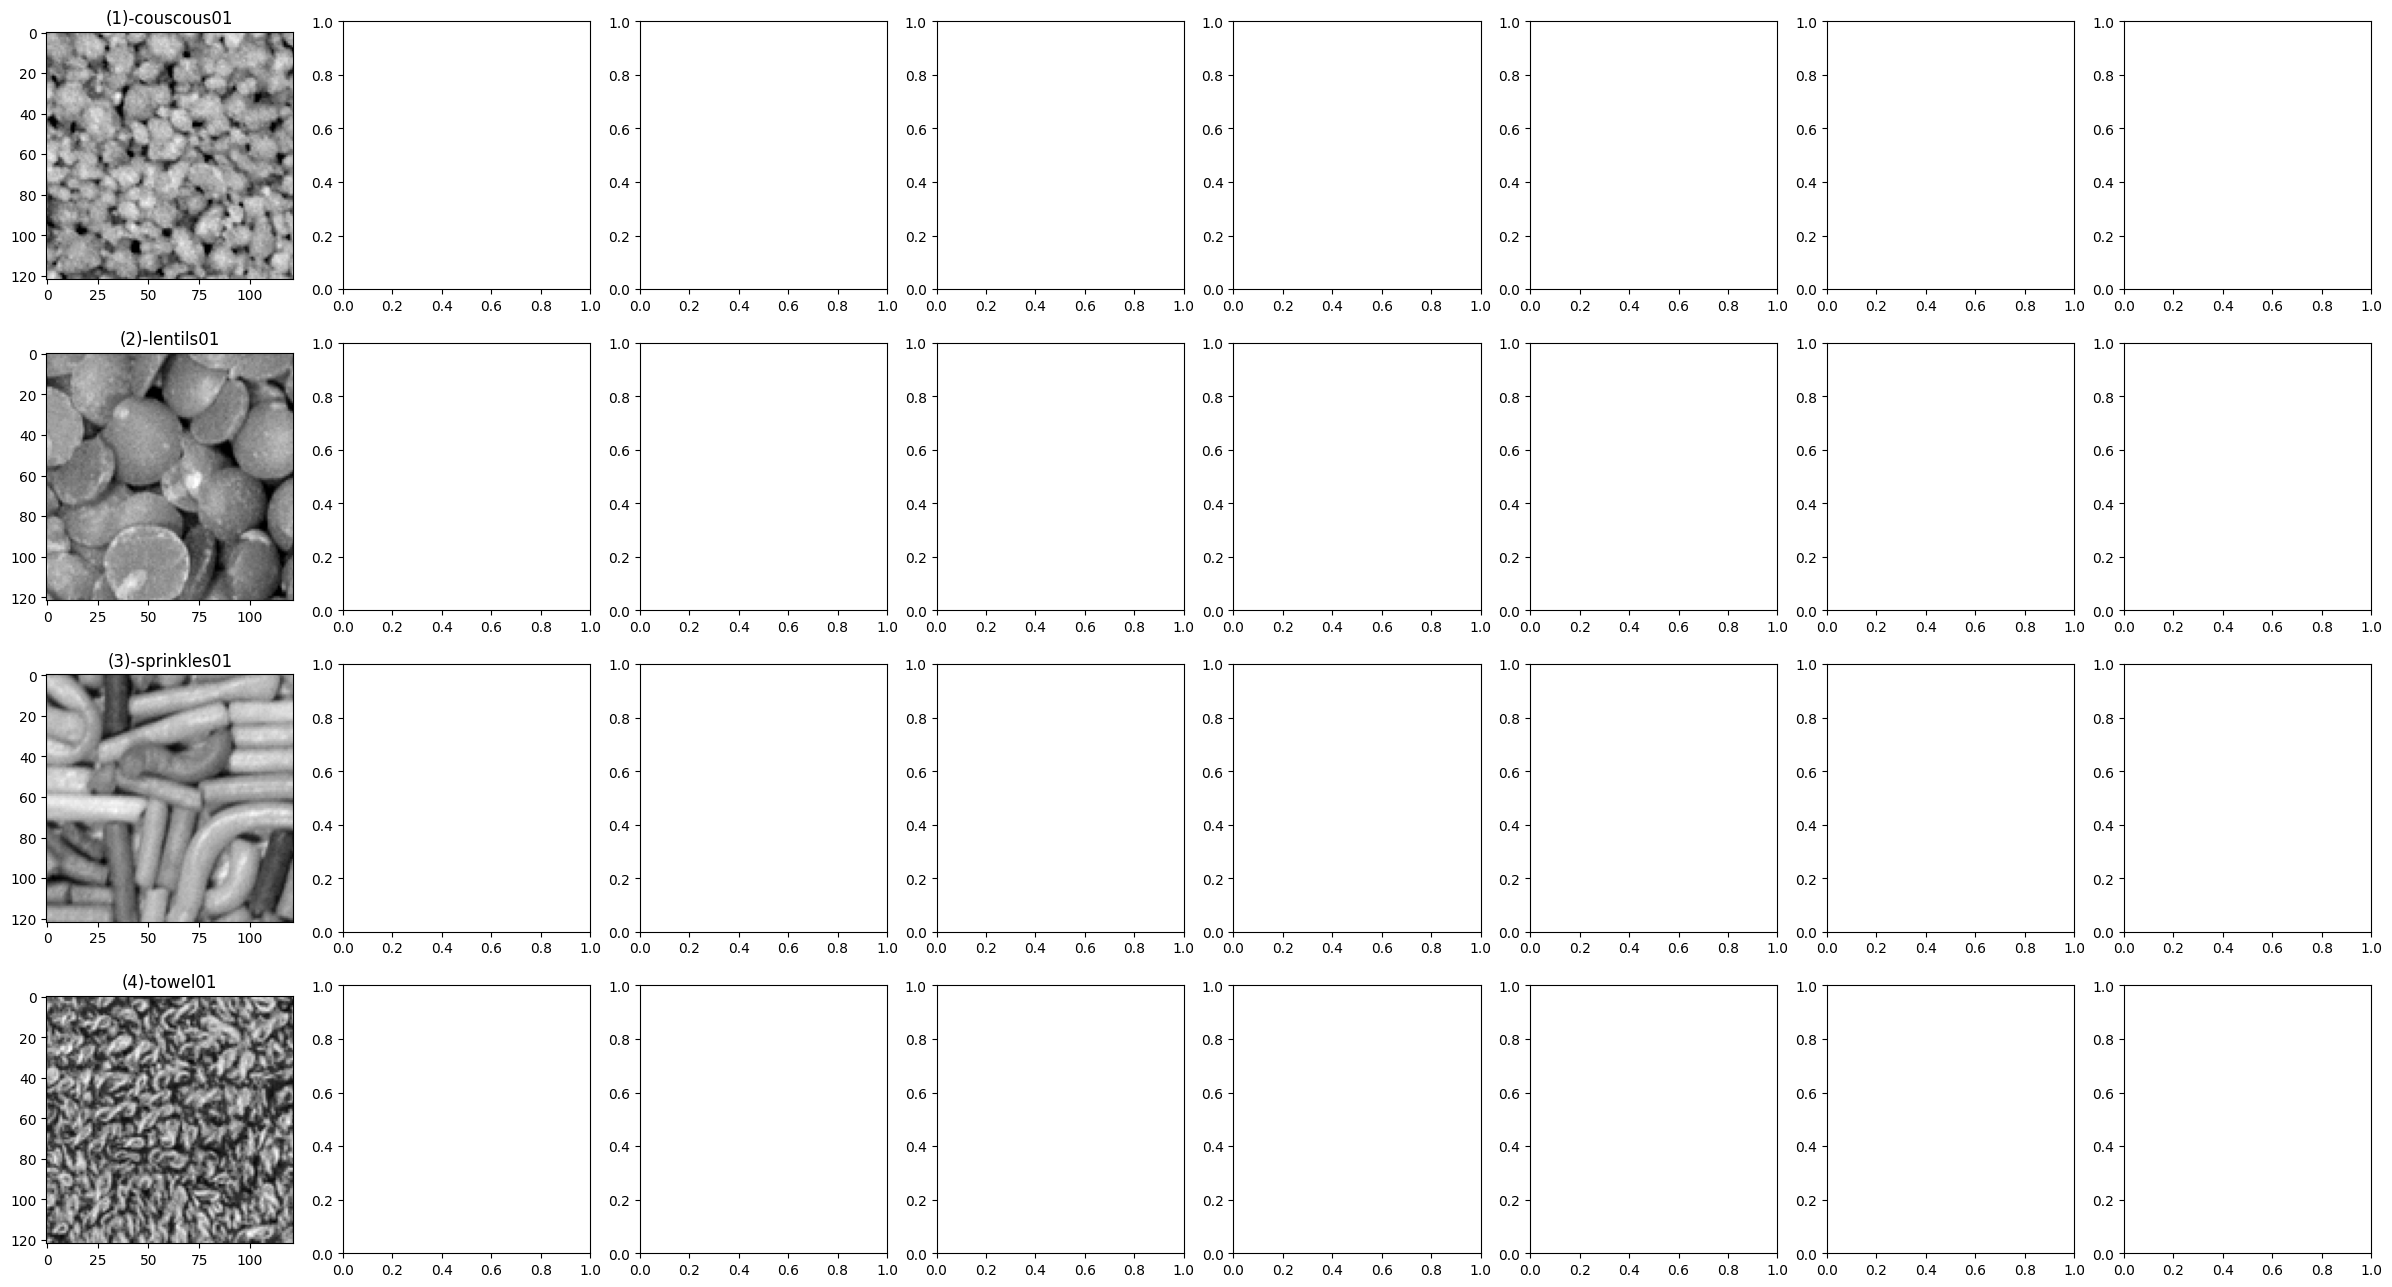

In [41]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/speckle/images"

for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # noise intensity
    intensity_values = dataset_data_q0['noise_intensity'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, intensity_chosen in enumerate(intensity_values):
        # noised image
        noised_image = add_speckle_noise(gs_image, intensity=intensity_chosen, mean=0.5, sigma=0.1)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-int-{intensity_chosen}.png")

    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)].sort_values('noise_intensity')
    # display(df_data_filtered)
    # break
    image_data = df_data_filtered[(df_data_filtered['noise_intensity'] == 0)]
    # df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True).sort_values('noise_intensity')

    for (x_label, y_label) in [('Smoothness', 'Curve structure'), ('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main = plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # Process data with gradient
        df_sorted = df_data_filtered.sort_values('noise_intensity')
        x = df_sorted[x_label].values
        y = df_sorted[y_label].values
        probs = df_sorted['noise_intensity'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "noise_gradient", [dict_color['original'], dict_color['noise_sd']]
        )
        norm = plt.Normalize(vmin=0, vmax=probs.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(probs)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)

        # Original data point
        ax_main.scatter(image_data[x_label], image_data[y_label],
                       c=dict_color['original'], edgecolors='none', marker='o', s=50)
        axins.scatter(image_data[x_label], image_data[y_label],
                     c=dict_color['original'], edgecolors='none', marker='o', s=50)

        # Create legend
        gradient_handle = GradientLegendHandle(dict_color['original'], dict_color['noise_sd'])
        ax_main.legend(
            [gradient_handle, plt.Line2D([], [], color=dict_color['original'], marker='o', linestyle='None')],
            [f"{imageName.split('-')[0]} speckle", f"{imageName.split('-')[0]}"],
            handler_map={GradientLegendHandle: HandlerGradientLines()},
            loc='best',
            framealpha=1,
            fontsize=8
        )

        # Axis configuration
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='gray')
        ax_main.axvline(x=0, lw=2, color='gray')
        axins.axhline(y=0, lw=2, color='gray')
        axins.axvline(x=0, lw=2, color='gray')
        
        # Inset configuration
        x1, x2 = np.min(x)-0.01, np.max(x)+0.01
        y1, y2 = np.min(y)-0.01, np.max(y)+0.01
        axins.grid(True)
        axins.set(xlim=(x1, x2), ylim=(y1, y2), aspect='auto')
        ax_main.indicate_inset_zoom(axins, edgecolor='0.4')
        
        if x_label == 'Smoothness':
            ax_main.set_title(f'SCS', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Smoothness', fontsize=12)
            ax_main.set_ylabel('Curve Structure', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_title(f'CECP', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Entropy', fontsize=12)
            ax_main.set_ylabel('Complexity', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-cecp.png', bbox_inches='tight')

        
        plt.close(fig)

## SKI IMAGES

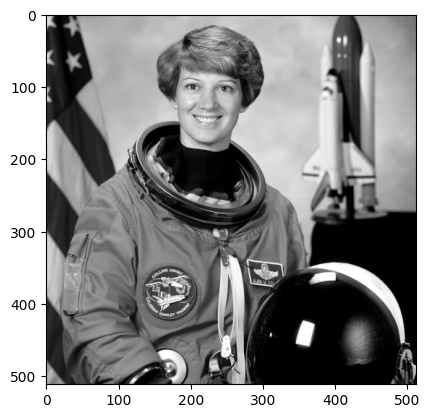

In [3]:
astronaut_image = data.astronaut()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

In [2]:
skimage_data = pd.read_csv(f"results/noise_analysis/speckle/speckle_analysis_skimage_noisegen.csv")
skimage_data

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_mean,noise_sigma
0,0,0.226687,0.149256,0.942420,0.066415,0.560020,0.294618,0.145362,data.astronaut,0,0.00
1,0,0.143541,0.089763,0.967932,0.035205,0.476875,0.306444,0.216681,data.astronaut,0,0.05
2,0,0.118618,0.066364,0.972583,0.029337,0.451951,0.307206,0.240842,data.astronaut,0,0.10
3,0,0.104425,0.054783,0.974420,0.027034,0.437759,0.308512,0.253729,data.astronaut,0,0.15
4,0,0.097004,0.044259,0.975335,0.025890,0.430337,0.306961,0.262702,data.astronaut,0,0.20
...,...,...,...,...,...,...,...,...,...,...,...
88,0,0.002427,0.004911,0.999977,0.000030,0.335760,0.334575,0.329665,data.coins,0,1.30
89,0,0.001648,0.011758,0.999943,0.000075,0.334982,0.338388,0.326630,data.coins,0,1.35
90,0,0.000464,0.004107,0.999970,0.000039,0.333797,0.335155,0.331048,data.coins,0,1.40
91,0,0.001614,0.004167,0.999959,0.000054,0.334947,0.334610,0.330443,data.coins,0,1.45


In [9]:
skimage_data[['image_name', 'noise_sigma', 'Smoothness', 'Curve structure', 'Weighted Entropy Correct', 'Weighted Complexity Correct']].head(21)

,image_name,noise_sigma,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct
0,data.astronaut,0.00,0.226687,0.149256,0.942420,0.066415
1,data.astronaut,0.05,0.143541,0.089763,0.967932,0.035205
2,data.astronaut,0.10,0.118618,0.066364,0.972583,0.029337
3,data.astronaut,0.15,0.104425,0.054783,0.974420,0.027034
4,data.astronaut,0.20,0.097004,0.044259,0.975335,0.025890
5,data.astronaut,0.25,0.091179,0.038136,0.975640,0.025428
6,data.astronaut,0.30,0.084193,0.032912,0.976217,0.024756
7,data.astronaut,0.35,0.080988,0.030128,0.976604,0.024343
8,data.astronaut,0.40,0.079410,0.030074,0.976407,0.024497
9,data.astronaut,0.45,0.076917,0.025253,0.976916,0.023973


In [3]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [4]:
skimage_data['noise_mean'].unique()

array([0], dtype=int64)

In [5]:
skimage_data['noise_sigma'].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ])

In [6]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_23492\3248815654.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_23492\3248815654.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_23492\3248815654.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layo

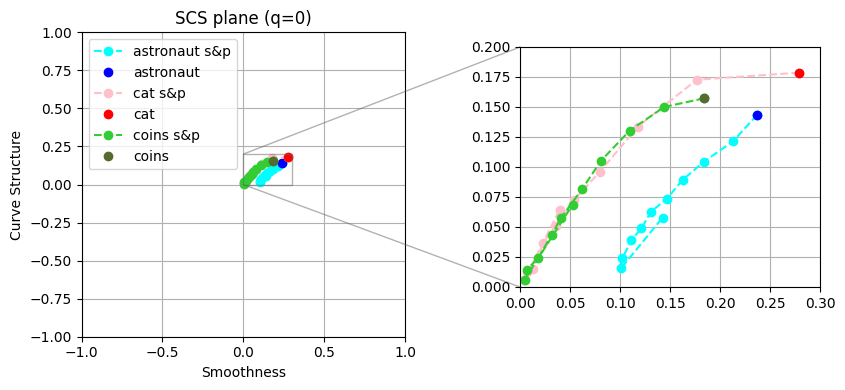

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}
unique_skimage_images = skimage_data['image_name'].unique()

chosen_means = [-1, 1]
chosen_sigmas = [0.1, 0.4]


fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for chosen_mean in chosen_means:
    for chosen_sigma in chosen_sigmas:
        for i, imageName in enumerate(unique_skimage_images):
            # Filter DataFrame for the current imageName
            df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName) & (skimage_data['noise_mean'] == chosen_mean) & (skimage_data['noise_sigma'] == chosen_sigma)]
            # Get the original data (no noise)
            df_no_noise = df_data_filtered[(df_data_filtered['noise_intensity'] == 0)]
            
            # plot data varying noise prob
            ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
            axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
            # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
            
            # plot it
            ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
            axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                            # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
            # Create scatter plot for Smoothness vs. Curve structure, colored by q
            # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
            

        # Set title and labels for the subplot
        ax_main.set_title(f'SCS plane (q={q_value})')
        ax_main.set_xlabel('Smoothness')
        ax_main.set_ylabel('Curve Structure')
        ax_main.set_xlim([-1, 1])
        ax_main.set_ylim([-1, 1])
        ax_main.grid(True)
        ax_main.legend()

        x1, x2, y1, y2 = 0, 0.3, 0, 0.2
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
        # Adjust layout to prevent overlap
        plt.tight_layout()
        # Save
        plt.savefig(f'results/noise_analysis/q0/speckle/speckle_skimage_scs_q{q_value}_mean_{chosen_mean}_sigma_{chosen_sigma}.png', bbox_inches='tight')
        # Show the plot
        plt.show()

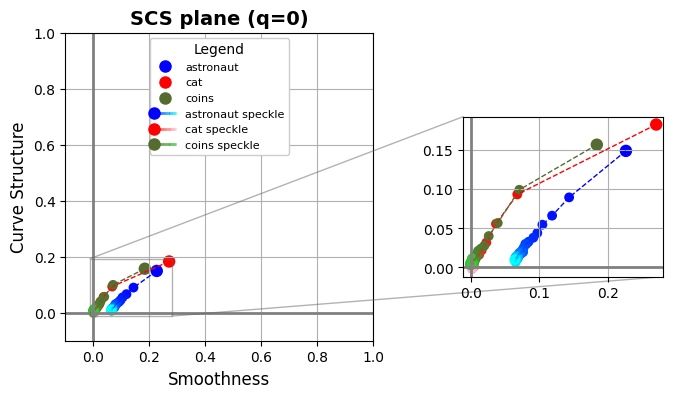

In [7]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}

unique_skimage_images = skimage_data['image_name'].unique()
chosen_means = [0]

for chosen_mean in chosen_means:
    fig, ax_main = plt.subplots(figsize=(5,4))
    axins = plt.axes([1.0, 0.27, 0.4, 0.4])
    gradient_handles = []
    original_handles = []
    # getting inset limits
    x1, x2 = np.inf, -np.inf
    y1, y2 = np.inf, -np.inf
    for i, imageName in enumerate(unique_skimage_images):
        df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName) & (skimage_data['noise_mean'] == chosen_mean)].sort_values('noise_sigma')
        base_name = imageName.split('.')[1]
        
        if len(df_data_filtered) >= 2:
            x = df_data_filtered['Smoothness'].values
            y = df_data_filtered['Curve structure'].values
            noise_intensities = df_data_filtered['noise_sigma'].values
            
            # Create line segments
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Create colormap
            original_color = figname_to_color[imageName]
            noise_color = figname_to_color[f"{imageName}_noise"]
            cmap = mcolors.LinearSegmentedColormap.from_list(
                f"{base_name}_cmap", [original_color, noise_color]
            )
            norm = plt.Normalize(vmin=noise_intensities.min(), vmax=noise_intensities.max())
            
            # Plot gradient lines
            for ax in [ax_main, axins]:
                lc = LineCollection(segments, cmap=cmap, norm=norm, 
                                linestyle='--', linewidth=1)
                lc.set_array(noise_intensities)
                ax.add_collection(lc)
            
            # Plot gradient markers
            colors = cmap(norm(noise_intensities))
            ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
            axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
            
            gradient_handles.append(GradientLegendHandle(original_color, noise_color))
        
        # Plot original points
        df_no_noise = df_data_filtered[df_data_filtered['noise_sigma'] == 0]
        original_color = figname_to_color[imageName]
        ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                    c=original_color, edgecolors='none', marker='o', s=80)
        axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                    c=original_color, edgecolors='none', marker='o', s=80)
        
        original_handles.append(
            plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                    label=base_name, markersize=8)
        )
        # update the inset limits
        x1 = x1 if np.min(x) >= x1 else np.min(x)
        x2 = x2 if np.max(x) <= x2 else np.max(x)
        y1 = y1 if np.min(y) >= y1 else np.min(y)
        y2 = y2 if np.max(y) <= y2 else np.max(y)

    # Create combined legend
    all_handles = original_handles + gradient_handles
    all_labels = [h.get_label() for h in original_handles] + \
                [f"{img.split('.')[1]} speckle" for img in unique_skimage_images]

    ax_main.legend(
        all_handles,
        all_labels,
        handler_map={GradientLegendHandle: HandlerGradientLines()},
        loc='best',
        framealpha=1,
        fontsize=8,
        title='Legend',
        title_fontsize=10
    )

    # Configure axes
    ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Smoothness', fontsize=12)
    ax_main.set_ylabel('Curve Structure', fontsize=12)
    ax_main.set_xlim([-0.1, 1])
    ax_main.set_ylim([-0.1, 1])
    ax_main.set_aspect('equal')
    ax_main.grid(True)
    ax_main.axhline(y=0, lw=2, color='gray')
    ax_main.axvline(x=0, lw=2, color='gray')

    # Configure inset
    x1, x2 = x1-0.01, x2+0.01
    y1, y2 = y1-0.01, y2+0.01
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.axhline(y=0, lw=2, color='gray')
    axins.axvline(x=0, lw=2, color='gray')
    axins.set_aspect('auto')
    axins.grid(True)
    ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

    # plt.tight_layout()
    plt.savefig(f'results/noise_analysis/q0/speckle/speckle_skimage_scs_q{q_value}_noisegen.png', bbox_inches='tight')
    plt.show()

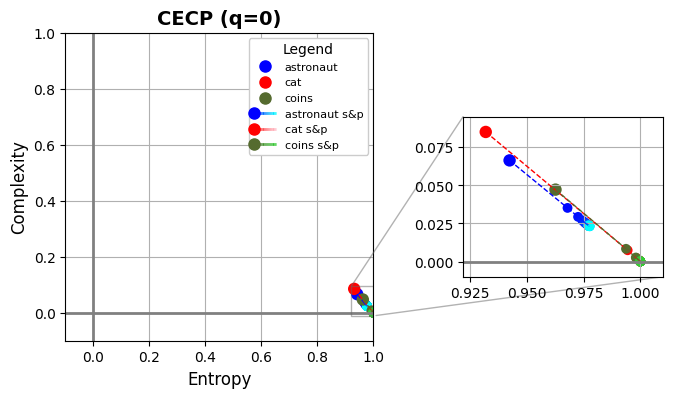

In [8]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}

unique_skimage_images = skimage_data['image_name'].unique()
chosen_means = [0]

for chosen_mean in chosen_means:
    fig, ax_main = plt.subplots(figsize=(5,4))
    axins = plt.axes([1.0, 0.27, 0.4, 0.4])
    gradient_handles = []
    original_handles = []
    # getting inset limits
    x1, x2 = np.inf, -np.inf
    y1, y2 = np.inf, -np.inf

    for i, imageName in enumerate(unique_skimage_images):
        df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName) & (skimage_data['noise_mean'] == chosen_mean)].sort_values('noise_sigma')
        base_name = imageName.split('.')[1]
        
        if len(df_data_filtered) >= 2:
            x = df_data_filtered['Weighted Entropy Correct'].values
            y = df_data_filtered['Weighted Complexity Correct'].values
            noise_intensities = df_data_filtered['noise_sigma'].values
            
            # Create line segments
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Create colormap
            original_color = figname_to_color[imageName]
            noise_color = figname_to_color[f"{imageName}_noise"]
            cmap = mcolors.LinearSegmentedColormap.from_list(
                f"{base_name}_cmap", [original_color, noise_color]
            )
            norm = plt.Normalize(vmin=noise_intensities.min(), vmax=noise_intensities.max())
            
            # Plot gradient lines
            for ax in [ax_main, axins]:
                lc = LineCollection(segments, cmap=cmap, norm=norm, 
                                linestyle='--', linewidth=1)
                lc.set_array(noise_intensities)
                ax.add_collection(lc)
            
            # Plot gradient markers
            colors = cmap(norm(noise_intensities))
            ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
            axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
            
            gradient_handles.append(GradientLegendHandle(original_color, noise_color))
        
        # Plot original points
        df_no_noise = df_data_filtered[df_data_filtered['noise_sigma'] == 0]
        original_color = figname_to_color[imageName]
        ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                    c=original_color, edgecolors='none', marker='o', s=80)
        axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                    c=original_color, edgecolors='none', marker='o', s=80)
        
        original_handles.append(
            plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                    label=base_name, markersize=8)
        )
        # update the inset limits
        x1 = x1 if np.min(x) >= x1 else np.min(x)
        x2 = x2 if np.max(x) <= x2 else np.max(x)
        y1 = y1 if np.min(y) >= y1 else np.min(y)
        y2 = y2 if np.max(y) <= y2 else np.max(y)

    # Create combined legend
    all_handles = original_handles + gradient_handles
    all_labels = [h.get_label() for h in original_handles] + \
                [f"{img.split('.')[1]} s&p" for img in unique_skimage_images]

    ax_main.legend(
        all_handles,
        all_labels,
        handler_map={GradientLegendHandle: HandlerGradientLines()},
        loc='best',
        framealpha=1,
        fontsize=8,
        title='Legend',
        title_fontsize=10
    )

    # Configure axes
    ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Entropy', fontsize=12)
    ax_main.set_ylabel('Complexity', fontsize=12)
    ax_main.set_xlim([-0.1, 1])
    ax_main.set_ylim([-0.1, 1])
    ax_main.set_aspect('equal')
    ax_main.grid(True)
    ax_main.axhline(y=0, lw=2, color='gray')
    ax_main.axvline(x=0, lw=2, color='gray')

    # Configure inset
    x1, x2 = x1-0.01, x2+0.01
    y1, y2 = y1-0.01, y2+0.01
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.axhline(y=0, lw=2, color='gray')
    axins.axvline(x=0, lw=2, color='gray')
    axins.set_aspect('auto')
    axins.grid(True)
    ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

    # plt.tight_layout()
    plt.savefig(f'results/noise_analysis/q0/speckle/speckle_skimage_cecp_q{q_value}_noisegen.png', bbox_inches='tight')
    plt.show()